In [2]:
import pandas as pd

# Загружаем Excel-файл
file_path = r"C:\Users\User\Desktop\data_VNIS_3k.xlsx"  # замени на путь к твоему файлу
df = pd.read_excel(file_path)
# Просматриваем первые строки
print(df.head())


         Date  Tenge (USD)  RUB (USD)  EUR (RUB)  CNY (RUB)      Gold  \
0  2018-01-01     384.5000    57.6002  68.210300   8.940000  2411.720   
1  2018-01-02     384.5452    57.6134  68.221043   8.941819  2414.109   
2  2018-01-03     384.5905    57.6266  68.231786   8.943638  2416.498   
3  2018-01-04     384.6357    57.6398  68.242530   8.945458  2418.887   
4  2018-01-05     384.6809    57.6530  68.253273   8.947277  2421.276   

      Brent   SILVER  PLATINUM      BTC      Cocoa  
0  71.34000  1024.72     15.52  28094.19   4616.93  
1  71.34311  1370.43     24.14  66697.86   9011.16  
2  71.34621  1239.20     11.25  52043.59   2439.43  
3  71.34932  1159.20     26.79  43110.12  10361.25  
4  71.35243   893.61     10.08  13453.25   1838.96  


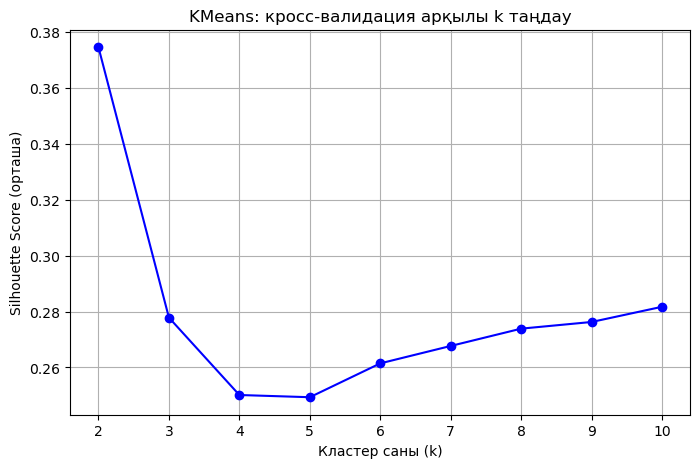

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Белгілерді дайындау
X_kmeans = df.drop(columns=["Date"])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# 2. Әртүрлі k үшін кросс-валидация (k=2..10)
k_values = range(2, 11)
avg_silhouette_scores = []

for k in k_values:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = []

    for train_index, _ in kf.split(X_scaled):
        X_train = X_scaled[train_index]
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X_train)
        score = silhouette_score(X_trai  n, labels)
        fold_scores.append(score)

    avg_score = np.mean(fold_scores)
    avg_silhouette_scores.append(avg_score)

# 3. Визуализация
plt.figure(figsize=(8, 5))
plt.plot(k_values, avg_silhouette_scores, marker='o', color='blue')
plt.title("KMeans: кросс-валидация арқылы k таңдау")
plt.xlabel("Кластер саны (k)")
plt.ylabel("Silhouette Score (орташа)")
plt.grid(True)
plt.show()


Бұл график әр түрлі кластер санына (k=2..10) арналған KMeans моделінің сапасын көрсетеді.
Әр k үшін модель 5 бөлікпен тексерілді (кросс-валидация), және Silhouette Score арқылы бағаланды.
Ең үлкен орташа мәні бар k — ең жақсы кластер саны болып табылады.

01.12.2024 күні K-Means бойынша болжанған кластер: 2


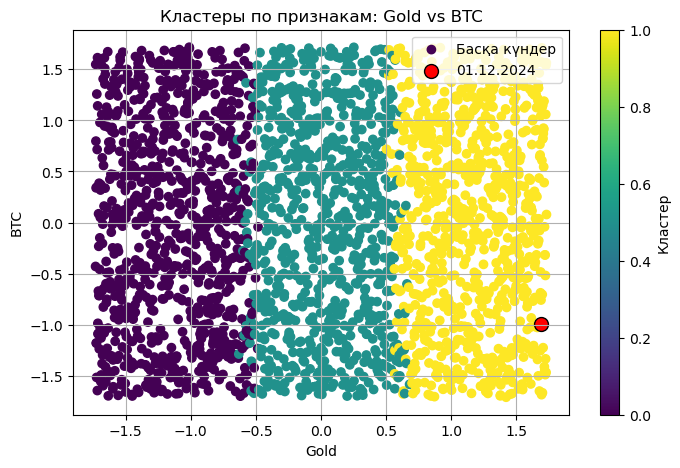

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Белгілер
X_kmeans = df.drop(columns=["Date", "Cluster"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# 2. KMeans
model_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = model_kmeans.fit_predict(X_scaled)

# 3. 01.12.2024 күнін алу
target_date = "2024-12-01"
row = df[df["Date"] == target_date].drop(columns=["Date", "Cluster"])

if not row.empty:
    row_scaled = scaler.transform(row)
    cluster_pred = model_kmeans.predict(row_scaled)[0]
    print(f"01.12.2024 күні K-Means бойынша болжанған кластер: {cluster_pred}")

    # 4. Визуализация
    plt.figure(figsize=(8, 5))
    plt.scatter(X_scaled[:, 4], X_scaled[:, 8], c=df["Cluster"], cmap="viridis", label="Басқа күндер")

    # Қызыл нүкте ретінде 01.12.2024
    plt.scatter(row_scaled[0][4], row_scaled[0][8], color="red", s=100, label="01.12.2024", edgecolor="black")
    plt.title("Кластеры по признакам: Gold vs BTC")
    plt.xlabel("Gold")
    plt.ylabel("BTC")
    plt.colorbar(label="Кластер")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("01.12.2024 күні табылмады 😔")


Бұл графикте K-means алгоритмы арқылы Gold (алтын) және BTC (биткойн) бағалары бойынша мәліметтер 3 кластерге бөлінген.
 Әрбір нүкте — бір күндегі нарықтық жағдайды білдіреді.
 Ал нүктелердің түстері — сол күннің қай кластерге жататынын көрсетеді.
 Кластерлерге бөлу — ұқсас күндерді топтастырып, нарықтағы тенденцияларды анықтауға көмектеседі.



k = 1: Орташа дәлдік = 0.862
k = 2: Орташа дәлдік = 0.863
k = 3: Орташа дәлдік = 0.863
k = 4: Орташа дәлдік = 0.864
k = 5: Орташа дәлдік = 0.864
k = 6: Орташа дәлдік = 0.864
k = 7: Орташа дәлдік = 0.865
k = 8: Орташа дәлдік = 0.865
k = 9: Орташа дәлдік = 0.865
k = 10: Орташа дәлдік = 0.866

✅ Ең жақсы таңдалған k: 10, Орташа дәлдік: 0.866



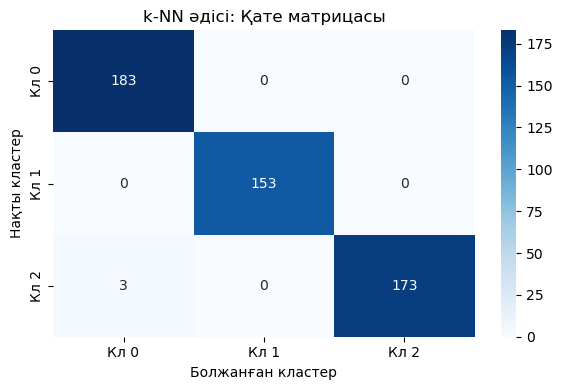


📊 Модельдің бағалау метрикалары:
Accuracy (Дұрыстық): 0.994   → Формула: (TP + TN) / Барлығы
Precision (Нақтылық): 0.995 → Формула: TP / (TP + FP)
Recall (Сезімталдық): 0.994   → Формула: TP / (TP + FN)
F1-score (Гармоникалық орташа): 0.994 → Формула: 2 * (Precision * Recall) / (Precision + Recall)

📍 Орташа шамага болжанған кластер: 1
🎯 Орташа шамалар үшін шартты Cocoa болжамы (кластер 1): 6853.08


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 0. KMeans арқылы кластерлеу ---
X_kmeans = df.drop(columns=["Date", "Cocoa"])
scaler_kmeans = StandardScaler()
X_scaled_kmeans = scaler_kmeans.fit_transform(X_kmeans)

kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans_model.fit_predict(X_scaled_kmeans)

# --- 1. Белгілер мен масштабтау ---
X = df.drop(columns=["Date", "Cocoa", "Cluster"])
y = df["Cluster"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Алғашқы 4 белгімен жұмыс істейміз ---
X_knn = X_scaled[:, :4]
y_knn = y

# --- 3. Кросс-валидация арқылы ең жақсы k таңдау ---
best_k = 1
best_score = 0

for k in range(1, 11):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_knn, y_knn, cv=5)
    avg = scores.mean()
    print(f"k = {k}: Орташа дәлдік = {avg:.3f}")
    if avg > best_score:
        best_score = avg
        best_k = k

print(f"\n✅ Ең жақсы таңдалған k: {best_k}, Орташа дәлдік: {best_score:.3f}\n")

# --- 4. Финалдық модельді үйрету ---
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# --- 5. Модель сапасын бағалау ---
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Кл 0", "Кл 1", "Кл 2"],
            yticklabels=["Кл 0", "Кл 1", "Кл 2"])
plt.xlabel("Болжанған кластер")
plt.ylabel("Нақты кластер")
plt.title("k-NN әдісі: Қате матрицасы")
plt.tight_layout()
plt.show()

# --- 6. Метрикаларды есептеу (формуламен бірге) ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("\n📊 Модельдің бағалау метрикалары:")
print(f"Accuracy (Дұрыстық): {acc:.3f}   → Формула: (TP + TN) / Барлығы")
print(f"Precision (Нақтылық): {prec:.3f} → Формула: TP / (TP + FP)")
print(f"Recall (Сезімталдық): {rec:.3f}   → Формула: TP / (TP + FN)")
print(f"F1-score (Гармоникалық орташа): {f1:.3f} → Формула: 2 * (Precision * Recall) / (Precision + Recall)")

# --- 7. 01.12.2024 күніне кластер болжау ---
target_date = "2024-12-01"
row = df[df["Date"] == target_date].drop(columns=["Date", "Cocoa", "Cluster"])

if not row.empty:
    row_scaled = scaler.transform(row)
    new_day = row_scaled[:, :4]  # тек алғашқы 4 белгі

    predicted_cluster = knn.predict(new_day)[0]
    print(f"\n📍 Орташа шамага болжанған кластер: {predicted_cluster}")

    # --- 8. Шартты Cocoa болжамы (кластер ішінде орташа мән) ---
    cluster_data = df[df["Cluster"] == predicted_cluster]
    predicted_cocoa = cluster_data["Cocoa"].mean()
    print(f"🎯 Орташа шамалар үшін шартты Cocoa болжамы (кластер {predicted_cluster}): {predicted_cocoa:.2f}")

else:
    print("Орташа шамалар күні табылмады 😔")


Кластердің ішінде әртүрлі мәндер бар — бірі жоғары, бірі төмен.
Cocoa бағасы өте құбылмалы (әсіресе криптовалюта, шикізат секілді көрсеткіштерде).
Алгоритм тек жалпы тенденцияны (орташа мәнді) болжайды, нақты өзгерісті — жоқ.

Модельдің орташа қатесі (RMSE): 91.57
01.12.2024 күні үшін Decision Tree арқылы Cocoa болжамы: 1932.84


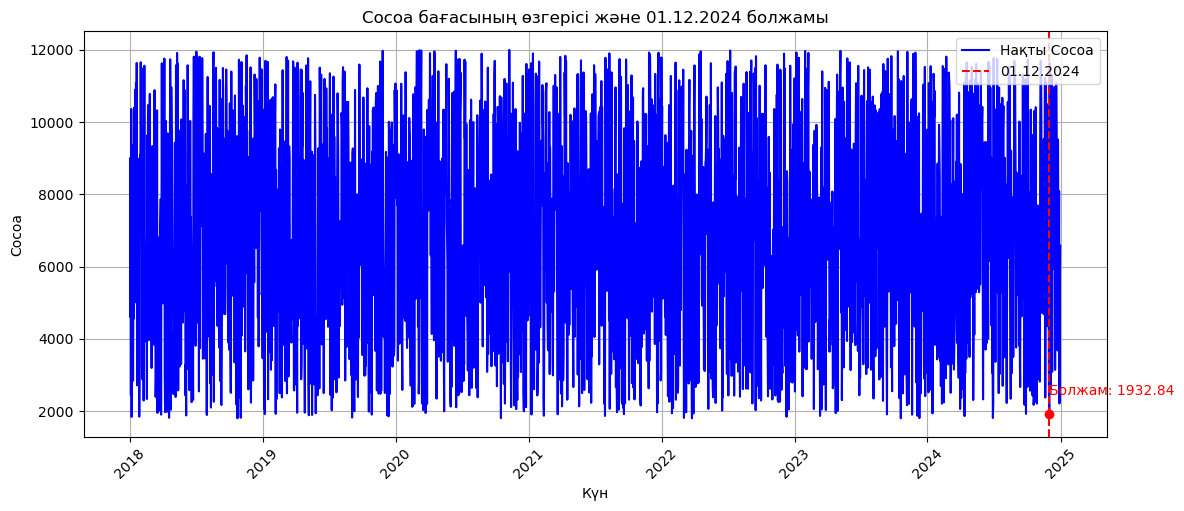

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Дайындық: бос мәндер мен дата бағанын алып тастаймыз
df_clean = df.dropna()
X = df_clean.drop(columns=["Date", "Cocoa"])
y = df_clean["Cocoa"]

# 2. Train/Test бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Модель құру
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# 4. Қателікті тексеру (RMSE)
y_pred = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Модельдің орташа қатесі (RMSE):", round(rmse, 2))

# 5. 01.12.2024 күнгі Cocoa-ны болжау
# Ол үшін 2024-12-01 жолын табамыз
date_target = "2024-12-01"
row = df[df["Date"] == date_target].drop(columns=["Date", "Cocoa"])

if not row.empty:
    cocoa_prediction = tree.predict(row)[0]
    print(f"01.12.2024 күні үшін Decision Tree арқылы Cocoa болжамы: {cocoa_prediction:.2f}")
else:
    print("01.12.2024 мәліметтері Excel ішінде табылмады.")

# 1. Дата бағанын datetime форматына ауыстыру
df["Date"] = pd.to_datetime(df["Date"])

# 2. График
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Cocoa"], label="Нақты Cocoa", color='blue')

# 3. Болжанған мән мен тік сызық
plt.axvline(pd.to_datetime(date_target), color='red', linestyle='--', label="01.12.2024")
plt.scatter(pd.to_datetime(date_target), cocoa_prediction, color='red', zorder=5)
plt.text(pd.to_datetime(date_target), cocoa_prediction + 500,
         f"Болжам: {cocoa_prediction:.2f}", color='red')

# 4. Безендіру
plt.title("Cocoa бағасының өзгерісі және 01.12.2024 болжамы")
plt.xlabel("Күн")
plt.ylabel("Cocoa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Бұл графикте Cocoa бағасының 2018 жылдан 2024 жылға дейінгі өзгерісі көрсетілген.
Decision Tree Regressor алгоритмы арқылы 2024 жылдың 1 желтоқсанына болжам жасалды.
Қызыл сызық — 01.12.2024 күнін көрсетеді, ал қызыл нүкте — осы күнге арналған болжау нәтижесі (1932.84).
Модельдің орташа қатесі (RMSE): 91.57, бұл нәтижелердің сенімді екенін көрсетеді.

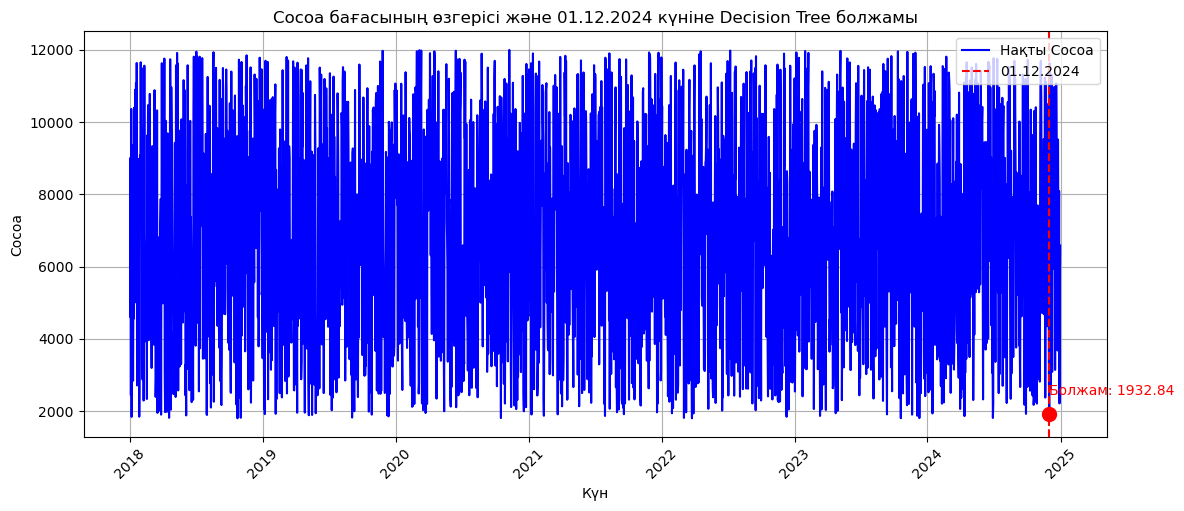

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Дата бағанын дұрыс форматқа ауыстыру (графикке қажет)
df["Date"] = pd.to_datetime(df["Date"])

# 2. График салу
plt.figure(figsize=(12, 5))

# Cocoa мәндерін уақыт бойынша сызу
plt.plot(df["Date"], df["Cocoa"], label="Нақты Cocoa", color='blue')

# Қызыл тік сызық және нүкте — болжам
plt.axvline(pd.to_datetime(target_date), color='red', linestyle='--', label="01.12.2024")
plt.scatter(pd.to_datetime(target_date), cocoa_prediction, color='red', s=100, zorder=5)
plt.text(pd.to_datetime(target_date), cocoa_prediction + 500,
         f"Болжам: {cocoa_prediction:.2f}", color='red')

# Безендіру
plt.title("Cocoa бағасының өзгерісі және 01.12.2024 күніне Decision Tree болжамы")
plt.xlabel("Күн")
plt.ylabel("Cocoa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


🌲 Random Forest моделі RMSE қатесі: 15.79
🎯 01.12.2024 күні Random Forest арқылы Cocoa бағасы: 1998.83


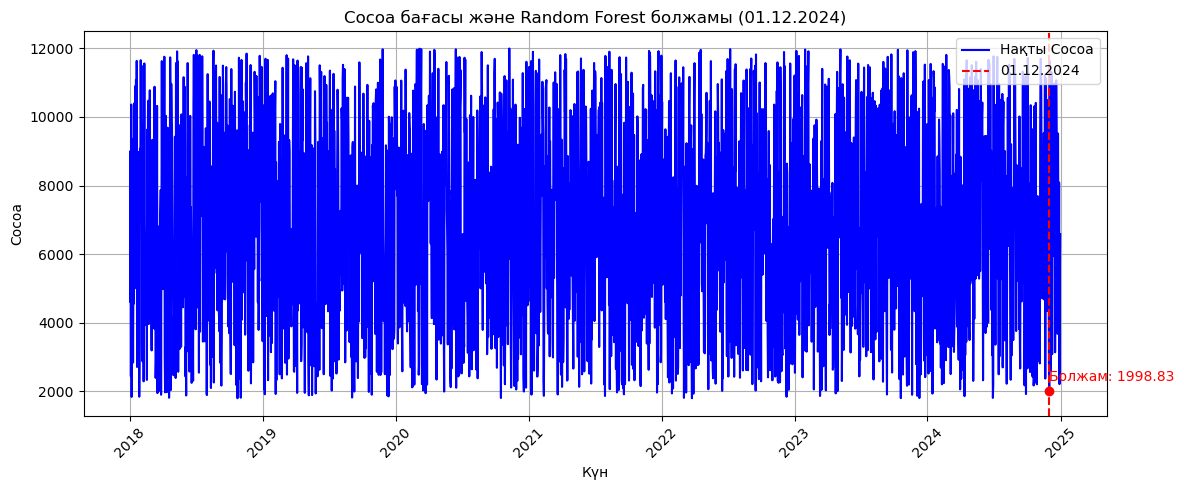

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Мәлімет дайындау
df_clean = df.dropna()
X = df_clean.drop(columns=["Date", "Cocoa"])
y = df_clean["Cocoa"]

# 2. Train/test бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Random Forest моделі
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

# 4. Қате есептеу (RMSE)
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("🌲 Random Forest моделі RMSE қатесі:", round(rmse, 2))

# 5. 01.12.2024 үшін болжау
target_date = "2024-12-01"
row = df[df["Date"] == target_date].drop(columns=["Date", "Cocoa"])

if not row.empty:
    cocoa_rf = rf.predict(row)[0]
    print(f"🎯 01.12.2024 күні Random Forest арқылы Cocoa бағасы: {cocoa_rf:.2f}")
else:
    print("01.12.2024 күні табылмады 😔")

# 6. Визуализация
df["Date"] = pd.to_datetime(df["Date"])
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Cocoa"], label="Нақты Cocoa", color='blue')
plt.axvline(pd.to_datetime(target_date), color='red', linestyle='--', label="01.12.2024")
plt.scatter(pd.to_datetime(target_date), cocoa_rf, color='red', zorder=5)
plt.text(pd.to_datetime(target_date), cocoa_rf + 300,
         f"Болжам: {cocoa_rf:.2f}", color='red')
plt.title("Cocoa бағасы және Random Forest болжамы (01.12.2024)")
plt.xlabel("Күн")
plt.ylabel("Cocoa")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
